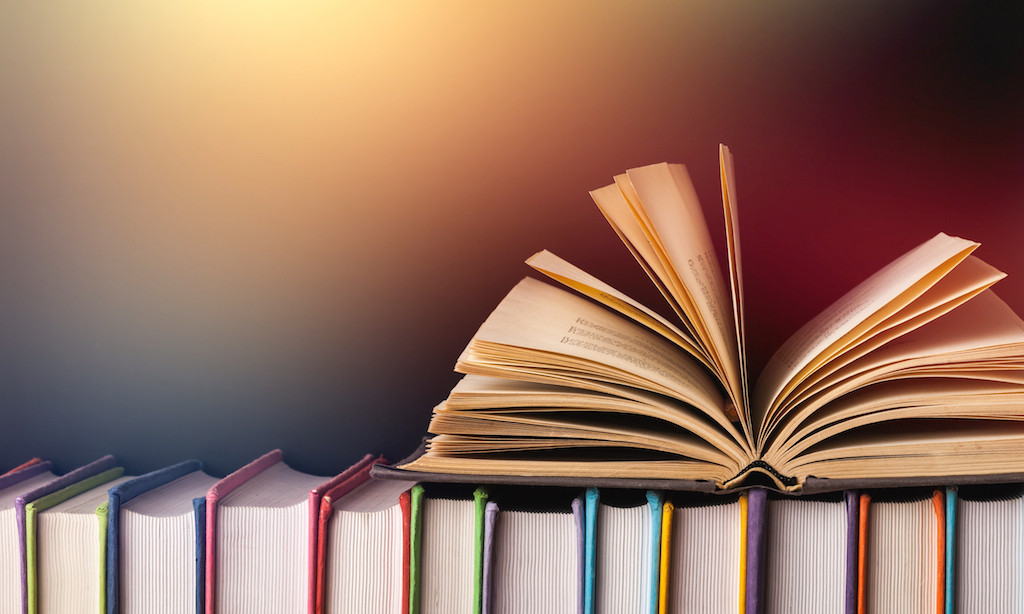

<h1><center><bold>Understanding the Apriori Algo</bold></center></h1>


The Apriori Alogrithm is a rather recent one and was proposed (sic..wiki!) by Agrawal and Srikant as recently as 1994.  Its an algorithm for frequent item set mining allowing companies to understand and organise up-selling and cross-selling activities.

One of the most powerful applications is in the Recommender System that we all see while shopping online on Amazon - and various other versions of it being present across nearly all e-commerce sites today.

This is to help understannnd a very simple data set containing single International Standard Book Number (ISBNs), which is a unique International Publisher's Identifier number for a book.  Where each row stands for a unique customer who has purchased the listed books.

The objective is to understand basis buying behaviour what are the other books to recommend to the customer - such that it can improve revenue for the company as well as overall satisfaction levels with the services offered. 

We conclude with a network map showcasing the relationship or priors with a confidence of above 55%

# **Table of Contents**
1. [Setup & Importing Dataset](#Section1)<br>
2. [EDA on data-set](#Section2)<br>
3. [Pre-processing](#Section3)<br>
4. [Building the Apriori Model](#Section4)<br>
5. [Conclusion - Network Map](#Section5)<br>

<a id = Section1></a>
### **1. Set-up & importing Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

data = pd.read_csv('dataset.csv',sep = " ", header = None, dtype = 'str')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,978-1-955198-55-4,978-0-7470-4524-3,978-1-05-479107-6,978-1-05-120740-2,978-1-79190-645-0,978-0-02-220013-8,978-0-8412-4012-4,978-0-14-352955-2,978-0-480-12936-1,978-0-935930-64-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,978-1-78225-168-2,978-1-05-120740-2,978-0-480-12936-1,978-1-79190-645-0,978-0-18-742168-3,978-0-373-33541-1,978-0-02-220013-8,978-1-4909-7583-2,978-0-19-091311-3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,978-0-8360-5239-8,978-1-79190-645-0,978-1-06-688598-5,978-0-85780-838-7,978-0-935930-64-1,978-0-7470-4524-3,978-1-05-120740-2,978-1-393-30483-8,978-0-04-753752-3,978-0-480-12936-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,978-0-470-69639-2,978-0-8412-4012-4,978-0-7470-4524-3,978-1-05-120740-2,978-0-02-220013-8,978-0-314-71454-1,978-1-58067-147-7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,978-0-07-745001-4,978-0-480-12936-1,978-0-949645-27-2,978-0-7486-2892-6,978-0-935930-64-1,978-1-61750-356-6,978-1-05-120740-2,978-1-393-30483-8,978-0-04-753752-3,978-0-7470-4524-3,...,978-0-8249-8333-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.shape

(100000, 22)

<a id = Section2></a>
### **2. EDA on data-set**

In [3]:
#performing the steps to stack, convert to string including dropping index
data2 = pd.DataFrame(data.stack(), columns=['Books'])
data2 = data2['Books'].apply(str)
data2 = data2.reset_index(drop = True)
data2

0         978-1-955198-55-4
1         978-0-7470-4524-3
2         978-1-05-479107-6
3         978-1-05-120740-2
4         978-1-79190-645-0
                ...        
911359    978-0-541-67280-5
911360    978-1-05-120740-2
911361    978-0-480-12936-1
911362    978-1-05-479107-6
911363    978-0-7470-4524-3
Name: Books, Length: 911364, dtype: object

In [4]:
data2.nunique()  # there are a total of 4,999 unique books

4999

In [5]:
#top 10 most purchased books from data-set
top_10 = pd.DataFrame(data2.value_counts(sort= True, ascending=False).head(10))
top_10.rename(columns = {'Books': 'Frequency'}, inplace = True)
top_10

,Frequency
978-1-05-120740-2,100000
978-0-7470-4524-3,50162
978-0-02-220013-8,33158
978-0-480-12936-1,24973
978-1-01-193279-5,20121
978-1-78225-168-2,16740
978-1-06-688598-5,14320
978-0-935930-64-1,12508
978-0-948675-44-7,11281
978-0-04-753752-3,10216


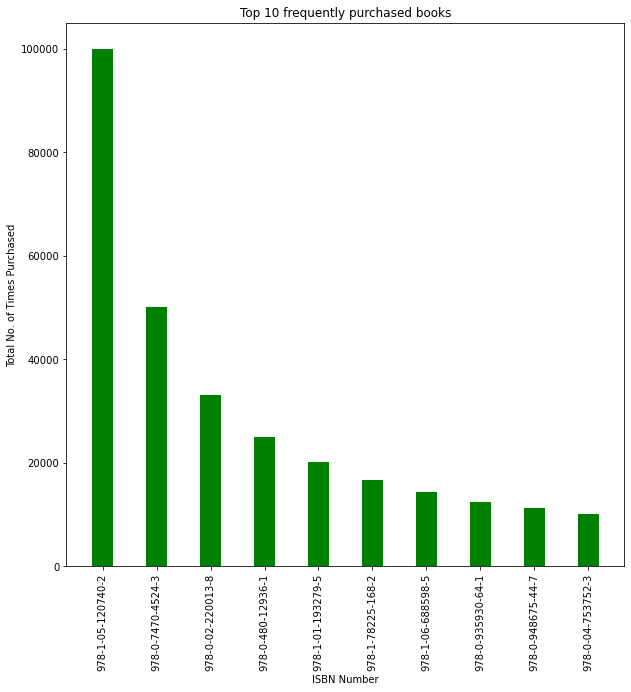

In [6]:
plt.figure(figsize = (10, 10)) 
  
# creating the bar plot 
plt.bar(top_10.index, top_10['Frequency'], color ='green', width = 0.4) 
  
plt.xlabel("ISBN Number") 
plt.ylabel("Total No. of Times Purchased")
plt.xticks(rotation='vertical')
plt.title("Top 10 frequently purchased books"); 

http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/#transactionencoder

In [7]:
import csv

tr = []
with open("dataset.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter= ' ' ) # change contents to floats
    for row in reader: # each row is a list
        tr.append(row)

<a id = Section3></a>
### **3. Pre-processing**

In [8]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_df = te.fit(data2).transform(data2)
te_df
#books = pd.DataFrame(te_df, columns=te.columns_)
#books.head()

array([[ True, False,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True]])

In [9]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_df = te.fit(tr).transform(tr)
te_df
#books = pd.DataFrame(te_df, columns=te.columns_)
#books.head()

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [10]:
te_df = te_df.astype("int")

te_df

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [11]:
import numpy as np
import pandas as pd

books = pd.DataFrame(te_df, columns=te.columns_)
books.head()

,,978-0-00-014058-6,978-0-00-041105-1,978-0-00-060392-0,978-0-00-068441-7,978-0-00-071506-7,978-0-00-140552-3,978-0-00-166040-3,978-0-00-181547-6,978-0-00-333033-5,...,978-1-997752-58-5,978-1-997889-30-4,978-1-998089-12-3,978-1-998152-01-8,978-1-998323-73-9,978-1-998405-58-9,978-1-998818-12-9,978-1-998844-49-4,978-1-9996544-5-0,978-1-9998398-5-7
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
books2 = books.copy(deep = True)
books2

,,978-0-00-014058-6,978-0-00-041105-1,978-0-00-060392-0,978-0-00-068441-7,978-0-00-071506-7,978-0-00-140552-3,978-0-00-166040-3,978-0-00-181547-6,978-0-00-333033-5,...,978-1-997752-58-5,978-1-997889-30-4,978-1-998089-12-3,978-1-998152-01-8,978-1-998323-73-9,978-1-998405-58-9,978-1-998818-12-9,978-1-998844-49-4,978-1-9996544-5-0,978-1-9998398-5-7
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
books2 = books2.drop(books2.columns[0], axis=1)
books2.head()

,978-0-00-014058-6,978-0-00-041105-1,978-0-00-060392-0,978-0-00-068441-7,978-0-00-071506-7,978-0-00-140552-3,978-0-00-166040-3,978-0-00-181547-6,978-0-00-333033-5,978-0-00-379486-1,...,978-1-997752-58-5,978-1-997889-30-4,978-1-998089-12-3,978-1-998152-01-8,978-1-998323-73-9,978-1-998405-58-9,978-1-998818-12-9,978-1-998844-49-4,978-1-9996544-5-0,978-1-9998398-5-7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id = Section4></a>
### **4. Building the apriori model**

In [14]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(books2, min_support=0.01, use_colnames=True)

In [15]:
frequent_itemsets

,support,itemsets
0,0.33158,(978-0-02-220013-8)
1,0.10216,(978-0-04-753752-3)
2,0.02019,(978-0-04-850567-5)
3,0.01376,(978-0-07-889289-9)
4,0.06246,(978-0-17-894701-7)
...,...,...
534,0.01037,"(978-0-935930-64-1, 978-0-7470-4524-3, 978-1-0..."
535,0.01104,"(978-1-01-193279-5, 978-0-7470-4524-3, 978-1-0..."
536,0.01449,"(978-1-01-193279-5, 978-1-06-688598-5, 978-0-7..."
537,0.01737,"(978-1-01-193279-5, 978-0-7470-4524-3, 978-1-0..."


In [16]:
frequent_itemsets.sort_values( by = ['support'] ,ascending = False)

,support,itemsets
48,1.00000,(978-1-05-120740-2)
30,0.50162,(978-0-7470-4524-3)
211,0.50162,"(978-0-7470-4524-3, 978-1-05-120740-2)"
0,0.33158,(978-0-02-220013-8)
113,0.33158,"(978-0-02-220013-8, 978-1-05-120740-2)"
...,...,...
283,0.01003,"(978-1-124-05196-3, 978-1-05-120740-2)"
438,0.01003,"(978-1-05-120740-2, 978-0-7470-4524-3, 978-0-8..."
55,0.01003,(978-1-124-05196-3)
344,0.01000,"(978-0-02-220013-8, 978-0-935930-64-1, 978-0-4..."


In [17]:
from mlxtend.frequent_patterns import association_rules

rules  =  association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(978-0-02-220013-8),(978-0-2280-1540-6),0.33158,0.08433,0.02812,0.084806,1.005645,0.000158,1.000520
1,(978-0-2280-1540-6),(978-0-02-220013-8),0.08433,0.33158,0.02812,0.333452,1.005645,0.000158,1.002808
2,(978-0-02-220013-8),(978-0-458-42459-7),0.33158,0.03192,0.01066,0.032149,1.007177,0.000076,1.000237
3,(978-0-458-42459-7),(978-0-02-220013-8),0.03192,0.33158,0.01066,0.333960,1.007177,0.000076,1.003573
4,(978-0-02-220013-8),(978-0-480-12936-1),0.33158,0.24973,0.08283,0.249804,1.000296,0.000025,1.000099


In [18]:
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
614,"(978-0-7470-4524-3, 978-0-480-12936-1)",(978-1-05-120740-2),0.12514,1.0,0.12514,1.0,1.0,0.0,inf
243,(978-1-190-91130-7),(978-1-05-120740-2),0.02704,1.0,0.02704,1.0,1.0,0.0,inf
270,(978-1-4145-9644-0),(978-1-05-120740-2),0.03698,1.0,0.03698,1.0,1.0,0.0,inf
268,(978-1-399-54913-4),(978-1-05-120740-2),0.01458,1.0,0.01458,1.0,1.0,0.0,inf
266,(978-1-398-89493-8),(978-1-05-120740-2),0.02531,1.0,0.02531,1.0,1.0,0.0,inf


In [19]:
rules = rules[rules['confidence'] >= 0.55]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
614,"(978-0-7470-4524-3, 978-0-480-12936-1)",(978-1-05-120740-2),0.12514,1.0,0.12514,1.0,1.0,0.0,inf
243,(978-1-190-91130-7),(978-1-05-120740-2),0.02704,1.0,0.02704,1.0,1.0,0.0,inf
270,(978-1-4145-9644-0),(978-1-05-120740-2),0.03698,1.0,0.03698,1.0,1.0,0.0,inf
268,(978-1-399-54913-4),(978-1-05-120740-2),0.01458,1.0,0.01458,1.0,1.0,0.0,inf
266,(978-1-398-89493-8),(978-1-05-120740-2),0.02531,1.0,0.02531,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
800,"(978-1-398-89493-8, 978-0-7470-4524-3)",(978-1-05-120740-2),0.01273,1.0,0.01273,1.0,1.0,0.0,inf
1146,"(978-1-06-688598-5, 978-0-7470-4524-3, 978-0-4...",(978-1-05-120740-2),0.01781,1.0,0.01781,1.0,1.0,0.0,inf
176,(978-0-7797-4377-3),(978-1-05-120740-2),0.01374,1.0,0.01374,1.0,1.0,0.0,inf
126,(978-0-7136-3205-7),(978-1-05-120740-2),0.02204,1.0,0.02204,1.0,1.0,0.0,inf


<a id = Section5></a>
### **5. Conclusion Network Map**

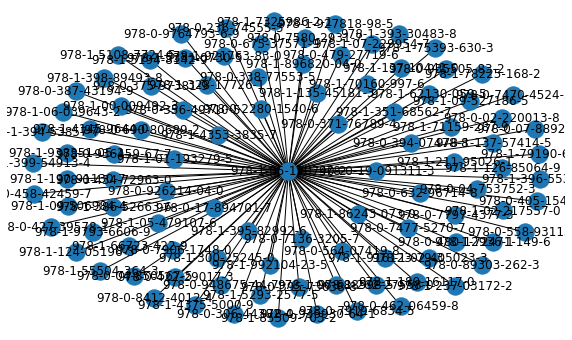

In [20]:
import networkx as nx
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)